# NLP Explore Exercises

01 March 2023, afternoon



In [1]:
# imports

import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p

from wordcloud import WordCloud

from env import get_connection

### 1/ Spam Data : Load the spam data set.
    Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    Is there any overlap in the bigrams for the spam data and the ham data?
    Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.



In [2]:
# SQL database url

url = get_connection('spam_db')

# define SQL query
query = '''
        SELECT *
        FROM spam
        '''

# read SQL
df = pd.read_sql(query, url, index_col = 'id')

In [3]:
# imported df 

df.head(3)

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
df.shape

(5572, 2)

In [5]:
def cleaning(text, extra_stops = []):
    
    wln = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stops
    
    # removing accents, etc : normalisation
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8').lower())
    
    # remove special characters (punctuation)
    text = re.sub(r"[^\w\s]",'', text).split()

    return [wln.lemmatize(word) for word in text if word not in stopwords]

In [6]:
# use a single space to connect the list of words together into a body of text
# setting variables to cleaned text and joining together from df['text']

ham_words = cleaning(' '.join(df[df['label'] == 'ham']['text']))
spam_words = cleaning(' '.join(df[df['label'] == 'spam']['text']))
all_words = cleaning(' '.join(df['text']))

In [7]:
# setting the cleaned txt to Series and counting word frequency

ham_count = pd.Series(ham_words).value_counts()
spam_count = pd.Series(spam_words).value_counts()
all_count = pd.Series(all_words).value_counts()

In [8]:
# creating df with value counts of all the words

freq = pd.concat([ham_count, spam_count, all_count], axis = 1)
freq.sample()

,0,1,2
rewarding,2.0,NaN,2


In [9]:
# looking at nulls

freq.isnull().sum()

0    1918
1    6086
2       0
dtype: int64

In [10]:
# dealing with nulls and col names

freq.columns = ['ham', 'spam', 'all']

freq.fillna(0, inplace = True)

In [11]:
freq.head(3)

,ham,spam,all
u,1027.0,155.0,1182
im,449.0,13.0,462
get,314.0,83.0,397


In [12]:
# wordtypes

freq.dtypes

ham     float64
spam    float64
all       int64
dtype: object

In [13]:
# changing to int

freq = freq.astype('int')

In [63]:
# making HAM bigrams

hambi = pd.Series(nltk.ngrams(ham_words, 2))
hambi.head()

0          (go, jurong)
1       (jurong, point)
2        (point, crazy)
3    (crazy, available)
4    (available, bugis)
dtype: object

In [64]:
# making HAM trigrams

hamtri = pd.Series(nltk.ngrams(ham_words, 3))
hamtri.head()

0          (go, jurong, point)
1       (jurong, point, crazy)
2    (point, crazy, available)
3    (crazy, available, bugis)
4        (available, bugis, n)
dtype: object

In [15]:
# making SPAM bigrams

spambi = pd.Series(nltk.ngrams(spam_words, 2))
spambi.head()

0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
dtype: object

In [65]:
# making SPAM trigrams

spamtri = pd.Series(nltk.ngrams(spam_words, 3))
spamtri.head()

0     (free, entry, 2)
1     (entry, 2, wkly)
2      (2, wkly, comp)
3    (wkly, comp, win)
4      (comp, win, fa)
dtype: object

In [16]:
# adding spam bigrams to df

df['spambi'] = spambi
df.head()

,label,text,spambi
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...","(free, entry)"
1,ham,Ok lar... Joking wif u oni...,"(entry, 2)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(2, wkly)"
3,ham,U dun say so early hor... U c already then say...,"(wkly, comp)"
4,ham,"Nah I don't think he goes to usf, he lives aro...","(comp, win)"


In [60]:
# top ham bigrams

fav_hambi = hambi.value_counts().head(30)

In [66]:
# top ham trigrams

fav_hamtri = hamtri.value_counts().head(30)

In [55]:
# top spam bigrams

fav_spambi = spambi.value_counts().head(30)

In [67]:
# top spam trigrams

fav_spamtri = spamtri.value_counts().head(30)

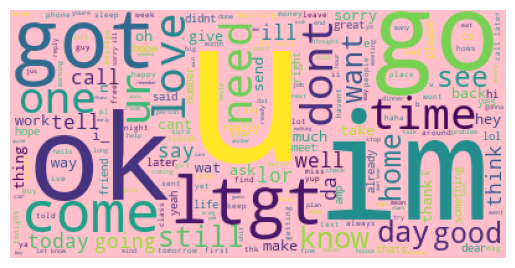

In [19]:
# ham word cloud

ham_cloud = WordCloud(background_color = 'pink').generate(' '.join(ham_words))

plt.imshow(ham_cloud)
plt.axis('off')

plt.show()

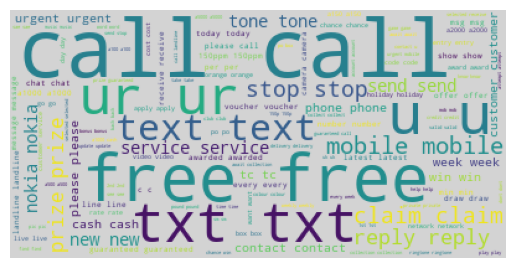

In [42]:
# spam word cloud

#spam_cloud = WordCloud(background_color = 'lightgrey').generate(' '.join(spam_words))
pam_cloud = WordCloud(background_color = 'lightgrey').generate(' '.join(' '.join(tup) for tup in spambi))



# result = ''.join(''.join(tup) for tup in my_list)

#plt.imshow(spam_cloud)
plt.imshow(pam_cloud)
plt.axis('off')

#plt.show(spam_cloud)
plt.show(pam_cloud)

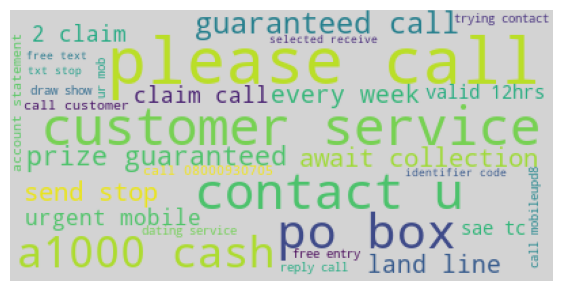

In [58]:
# fav_spambi wordcloud

# variable to contain dico of bigram key words and value count
donnees = {key[0] + ' ' + key[1] : value for key, value in fav_spambi.to_dict().items()}

# image variable to contain the wc of generated value counts
wc = WordCloud(background_color = 'lightgrey').generate_from_frequencies(donnees)

plt.figure(figsize=(7, 7))
plt.imshow(wc)
plt.axis('off')

plt.show()


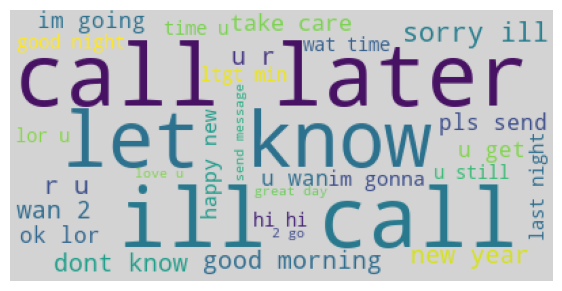

In [61]:
# fav_hambi wordcloud

# variable to contain dico of bigram key words and value count
donnees = {key[0] + ' ' + key[1] : value for key, value in fav_hambi.to_dict().items()}

# image variable to contain the wc of generated value counts
wc = WordCloud(background_color = 'lightgrey').generate_from_frequencies(donnees)

plt.figure(figsize=(7, 7))
plt.imshow(wc)
plt.axis('off')

plt.show()

**Takeaways : According to the word clouds for ham and for spam, the most popular words do not overlap.** 

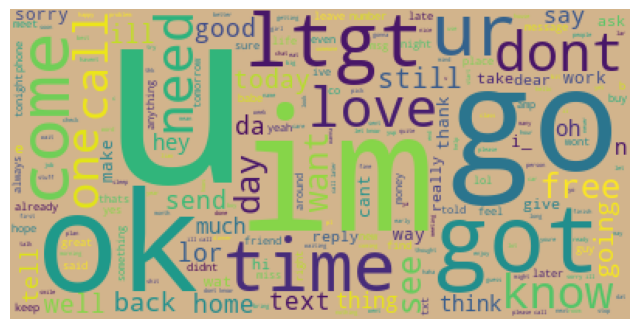

In [21]:
# all_words word cloud

all_cloud = WordCloud(background_color = 'tan').generate(' '.join(all_words))
plt.figure(figsize = (8, 5))
plt.imshow(all_cloud)
plt.axis('off')

plt.show()

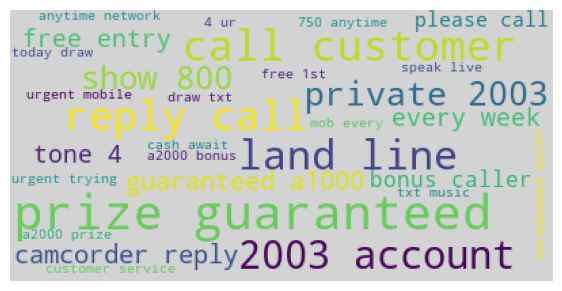

In [68]:
# fav_spamtri wordcloud

# variable to contain dico of bigram key words and value count
donnees3 = {key[0] + ' ' + key[1] : value for key, value in fav_spamtri.to_dict().items()}

# image variable to contain the wc of generated value counts
wc3 = WordCloud(background_color = 'lightgrey').generate_from_frequencies(donnees3)

plt.figure(figsize=(7, 7))
plt.imshow(wc3)
plt.axis('off')

plt.show()


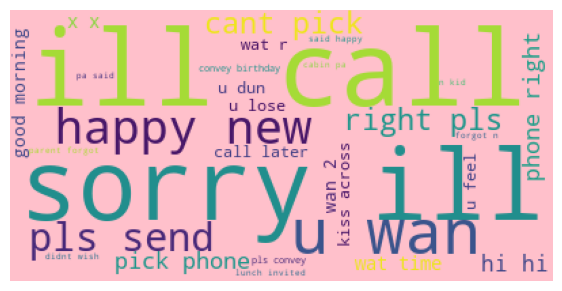

In [69]:
# fav_hamtri wordcloud

# variable to contain dico of bigram key words and value count
donnees4 = {key[0] + ' ' + key[1] : value for key, value in fav_hamtri.to_dict().items()}

# image variable to contain the wc of generated value counts
wc4 = WordCloud(background_color = 'pink').generate_from_frequencies(donnees4)

plt.figure(figsize=(7, 7))
plt.imshow(wc4)
plt.axis('off')

plt.show()